In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings # Optional
warnings.filterwarnings('ignore')
#read data from excel
data = pd.read_excel("/content/wine-clustering.xlsx")

In [ ]:
data.head()

Alcohol  Malic_Acid   Ash  Ash_Alcanity  Magnesium  Total_Phenols  \
0    14.23        1.71  2.43          15.6        127           2.80   
1    13.20        1.78  2.14          11.2        100           2.65   
2    13.16        2.36  2.67          18.6        101           2.80   
3    14.37        1.95  2.50          16.8        113           3.85   
4    13.24        2.59  2.87          21.0        118           2.80   

   Flavanoids  Nonflavanoid_Phenols  Proanthocyanins  Color_Intensity   Hue  \
0        3.06                  0.28             2.29             5.64  1.04   
1        2.76                  0.26             1.28             4.38  1.05   
2        3.24                  0.30             2.81             5.68  1.03   
3        3.49                  0.24             2.18             7.80  0.86   
4        2.69                  0.39             1.82             4.32  1.04   

   OD280  Proline  
0   3.92     1065  
1   3.40     1050  
2   3.17     1185  
3   3.45     1480  
4   2.93      735

In [ ]:
data.tail()

Alcohol  Malic_Acid   Ash  Ash_Alcanity  Magnesium  Total_Phenols  \
173    13.71        5.65  2.45          20.5         95           1.68   
174    13.40        3.91  2.48          23.0        102           1.80   
175    13.27        4.28  2.26          20.0        120           1.59   
176    13.17        2.59  2.37          20.0        120           1.65   
177    14.13        4.10  2.74          24.5         96           2.05   

     Flavanoids  Nonflavanoid_Phenols  Proanthocyanins  Color_Intensity   Hue  \
173        0.61                  0.52             1.06              7.7  0.64   
174        0.75                  0.43             1.41              7.3  0.70   
175        0.69                  0.43             1.35             10.2  0.59   
176        0.68                  0.53             1.46              9.3  0.60   
177        0.76                  0.56             1.35              9.2  0.61   

     OD280  Proline  
173   1.74      740  
174   1.56      750  
175   1.56      835  
176   1.62      840  
177   1.60      560

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178 entries, 0 to 177
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Alcohol               178 non-null    float64
 1   Malic_Acid            178 non-null    float64
 2   Ash                   178 non-null    float64
 3   Ash_Alcanity          178 non-null    float64
 4   Magnesium             178 non-null    int64  
 5   Total_Phenols         178 non-null    float64
 6   Flavanoids            178 non-null    float64
 7   Nonflavanoid_Phenols  178 non-null    float64
 8   Proanthocyanins       178 non-null    float64
 9   Color_Intensity       178 non-null    float64
 10  Hue                   178 non-null    float64
 11  OD280                 178 non-null    float64
 12  Proline               178 non-null    int64  
dtypes: float64(11), int64(2)
memory usage: 18.2 KB


In [ ]:
data.describe()

Alcohol  Malic_Acid         Ash  Ash_Alcanity   Magnesium  \
count  178.000000  178.000000  178.000000    178.000000  178.000000   
mean    13.000618    2.336348    2.366517     19.494944   99.741573   
std      0.811827    1.117146    0.274344      3.339564   14.282484   
min     11.030000    0.740000    1.360000     10.600000   70.000000   
25%     12.362500    1.602500    2.210000     17.200000   88.000000   
50%     13.050000    1.865000    2.360000     19.500000   98.000000   
75%     13.677500    3.082500    2.557500     21.500000  107.000000   
max     14.830000    5.800000    3.230000     30.000000  162.000000   

       Total_Phenols  Flavanoids  Nonflavanoid_Phenols  Proanthocyanins  \
count     178.000000  178.000000            178.000000       178.000000   
mean        2.295112    2.029270              0.361854         1.590899   
std         0.625851    0.998859              0.124453         0.572359   
min         0.980000    0.340000              0.130000         0.410000   
25%         1.742500    1.205000              0.270000         1.250000   
50%         2.355000    2.135000              0.340000         1.555000   
75%         2.800000    2.875000              0.437500         1.950000   
max         3.880000    5.080000              0.660000         3.580000   

       Color_Intensity         Hue       OD280      Proline  
count       178.000000  178.000000  178.000000   178.000000  
mean          5.058090    0.957449    2.611685   746.893258  
std           2.318286    0.228572    0.709990   314.907474  
min           1.280000    0.480000    1.270000   278.000000  
25%           3.220000    0.782500    1.937500   500.500000  
50%           4.690000    0.965000    2.780000   673.500000  
75%           6.200000    1.120000    3.170000   985.000000  
max          13.000000    1.710000    4.000000  1680.000000

In [ ]:
data.corr()

Alcohol  Malic_Acid       Ash  Ash_Alcanity  Magnesium  \
Alcohol               1.000000    0.094397  0.211545     -0.310235   0.270798   
Malic_Acid            0.094397    1.000000  0.164045      0.288500  -0.054575   
Ash                   0.211545    0.164045  1.000000      0.443367   0.286587   
Ash_Alcanity         -0.310235    0.288500  0.443367      1.000000  -0.083333   
Magnesium             0.270798   -0.054575  0.286587     -0.083333   1.000000   
Total_Phenols         0.289101   -0.335167  0.128980     -0.321113   0.214401   
Flavanoids            0.236815   -0.411007  0.115077     -0.351370   0.195784   
Nonflavanoid_Phenols -0.155929    0.292977  0.186230      0.361922  -0.256294   
Proanthocyanins       0.136698   -0.220746  0.009652     -0.197327   0.236441   
Color_Intensity       0.546364    0.248985  0.258887      0.018732   0.199950   
Hue                  -0.071747   -0.561296 -0.074667     -0.273955   0.055398   
OD280                 0.072343   -0.368710  0.003911     -0.276769   0.066004   
Proline               0.643720   -0.192011  0.223626     -0.440597   0.393351   

                      Total_Phenols  Flavanoids  Nonflavanoid_Phenols  \
Alcohol                    0.289101    0.236815             -0.155929   
Malic_Acid                -0.335167   -0.411007              0.292977   
Ash                        0.128980    0.115077              0.186230   
Ash_Alcanity              -0.321113   -0.351370              0.361922   
Magnesium                  0.214401    0.195784             -0.256294   
Total_Phenols              1.000000    0.864564             -0.449935   
Flavanoids                 0.864564    1.000000             -0.537900   
Nonflavanoid_Phenols      -0.449935   -0.537900              1.000000   
Proanthocyanins            0.612413    0.652692             -0.365845   
Color_Intensity           -0.055136   -0.172379              0.139057   
Hue                        0.433681    0.543479             -0.262640   
OD280                      0.699949    0.787194             -0.503270   
Proline                    0.498115    0.494193             -0.311385   

                      Proanthocyanins  Color_Intensity       Hue     OD280  \
Alcohol                      0.136698         0.546364 -0.071747  0.072343   
Malic_Acid                  -0.220746         0.248985 -0.561296 -0.368710   
Ash                          0.009652         0.258887 -0.074667  0.003911   
Ash_Alcanity                -0.197327         0.018732 -0.273955 -0.276769   
Magnesium                    0.236441         0.199950  0.055398  0.066004   
Total_Phenols                0.612413        -0.055136  0.433681  0.699949   
Flavanoids                   0.652692        -0.172379  0.543479  0.787194   
Nonflavanoid_Phenols        -0.365845         0.139057 -0.262640 -0.503270   
Proanthocyanins              1.000000        -0.025250  0.295544  0.519067   
Color_Intensity             -0.025250         1.000000 -0.521813 -0.428815   
Hue                          0.295544        -0.521813  1.000000  0.565468   
OD280                        0.519067        -0.428815  0.565468  1.000000   
Proline                      0.330417         0.316100  0.236183  0.312761   

                       Proline  
Alcohol               0.643720  
Malic_Acid           -0.192011  
Ash                   0.223626  
Ash_Alcanity         -0.440597  
Magnesium             0.393351  
Total_Phenols         0.498115  
Flavanoids            0.494193  
Nonflavanoid_Phenols -0.311385  
Proanthocyanins       0.330417  
Color_Intensity       0.316100  
Hue                   0.236183  
OD280                 0.312761  
Proline               1.000000

In [ ]:
data.columns

Index(['Alcohol', 'Malic_Acid', 'Ash', 'Ash_Alcanity', 'Magnesium',
       'Total_Phenols', 'Flavanoids', 'Nonflavanoid_Phenols',
       'Proanthocyanins', 'Color_Intensity', 'Hue', 'OD280', 'Proline'],
      dtype='object')

In [ ]:
data[['Alcohol','Malic_Acid','Ash']]

Alcohol  Malic_Acid   Ash
0      14.23        1.71  2.43
1      13.20        1.78  2.14
2      13.16        2.36  2.67
3      14.37        1.95  2.50
4      13.24        2.59  2.87
..       ...         ...   ...
173    13.71        5.65  2.45
174    13.40        3.91  2.48
175    13.27        4.28  2.26
176    13.17        2.59  2.37
177    14.13        4.10  2.74

[178 rows x 3 columns]

In [ ]:
type(data)

pandas.core.frame.DataFrame

In [ ]:
sorted_data = data.sort_values(by='Alcohol', ascending=False)
print(sorted_data)

     Alcohol  Malic_Acid   Ash  Ash_Alcanity  Magnesium  Total_Phenols  \
8      14.83        1.64  2.17          14.0         97           2.80   
13     14.75        1.73  2.39          11.4         91           3.10   
6      14.39        1.87  2.45          14.6         96           2.50   
46     14.38        3.59  2.28          16.0        102           3.25   
14     14.38        1.87  2.38          12.0        102           3.30   
..       ...         ...   ...           ...        ...            ...   
121    11.56        2.05  3.23          28.5        119           3.18   
110    11.46        3.74  1.82          19.5        107           3.18   
120    11.45        2.40  2.42          20.0         96           2.90   
113    11.41        0.74  2.50          21.0         88           2.48   
115    11.03        1.51  2.20          21.5         85           2.46   

     Flavanoids  Nonflavanoid_Phenols  Proanthocyanins  Color_Intensity   Hue  \
8          2.98               

In [ ]:
data.dtypes

Alcohol                 float64
Malic_Acid              float64
Ash                     float64
Ash_Alcanity            float64
Magnesium                 int64
Total_Phenols           float64
Flavanoids              float64
Nonflavanoid_Phenols    float64
Proanthocyanins         float64
Color_Intensity         float64
Hue                     float64
OD280                   float64
Proline                   int64
dtype: object

In [ ]:
data.iloc[0:5]

Alcohol  Malic_Acid   Ash  Ash_Alcanity  Magnesium  Total_Phenols  \
0    14.23        1.71  2.43          15.6        127           2.80   
1    13.20        1.78  2.14          11.2        100           2.65   
2    13.16        2.36  2.67          18.6        101           2.80   
3    14.37        1.95  2.50          16.8        113           3.85   
4    13.24        2.59  2.87          21.0        118           2.80   

   Flavanoids  Nonflavanoid_Phenols  Proanthocyanins  Color_Intensity   Hue  \
0        3.06                  0.28             2.29             5.64  1.04   
1        2.76                  0.26             1.28             4.38  1.05   
2        3.24                  0.30             2.81             5.68  1.03   
3        3.49                  0.24             2.18             7.80  0.86   
4        2.69                  0.39             1.82             4.32  1.04   

   OD280  Proline  
0   3.92     1065  
1   3.40     1050  
2   3.17     1185  
3   3.45     1480  
4   2.93      735

In [ ]:
data['Alcohol'] = data['Alcohol'].astype(int)
data['Alcohol']

0      14
1      13
2      13
3      14
4      13
       ..
173    13
174    13
175    13
176    13
177    14
Name: Alcohol, Length: 178, dtype: int64

In [ ]:
unique_values_count = data['Alcohol'].nunique()
print(unique_values_count)

4


In [ ]:
data.isnull()

Alcohol  Malic_Acid    Ash  Ash_Alcanity  Magnesium  Total_Phenols  \
0      False       False  False         False      False          False   
1      False       False  False         False      False          False   
2      False       False  False         False      False          False   
3      False       False  False         False      False          False   
4      False       False  False         False      False          False   
..       ...         ...    ...           ...        ...            ...   
173    False       False  False         False      False          False   
174    False       False  False         False      False          False   
175    False       False  False         False      False          False   
176    False       False  False         False      False          False   
177    False       False  False         False      False          False   

     Flavanoids  Nonflavanoid_Phenols  Proanthocyanins  Color_Intensity  \
0         False                 False            False            False   
1         False                 False            False            False   
2         False                 False            False            False   
3         False                 False            False            False   
4         False                 False            False            False   
..          ...                   ...              ...              ...   
173       False                 False            False            False   
174       False                 False            False            False   
175       False                 False            False            False   
176       False                 False            False            False   
177       False                 False            False            False   

       Hue  OD280  Proline  
0    False  False    False  
1    False  False    False  
2    False  False    False  
3    False  False    False  
4    False  False    False  
..     ...    ...      ...  
173  False  False    False  
174  False  False    False  
175  False  False    False  
176  False  False    False  
177  False  False    False  

[178 rows x 13 columns]

In [ ]:
missing_values = data.isnull().sum()
print(missing_values)

Alcohol                 0
Malic_Acid              0
Ash                     0
Ash_Alcanity            0
Magnesium               0
Total_Phenols           0
Flavanoids              0
Nonflavanoid_Phenols    0
Proanthocyanins         0
Color_Intensity         0
Hue                     0
OD280                   0
Proline                 0
dtype: int64


In [ ]:
data_filled = data.fillna(value=0)
print(data_filled.head())

   Alcohol  Malic_Acid   Ash  Ash_Alcanity  Magnesium  Total_Phenols  \
0       14        1.71  2.43          15.6        127           2.80   
1       13        1.78  2.14          11.2        100           2.65   
2       13        2.36  2.67          18.6        101           2.80   
3       14        1.95  2.50          16.8        113           3.85   
4       13        2.59  2.87          21.0        118           2.80   

   Flavanoids  Nonflavanoid_Phenols  Proanthocyanins  Color_Intensity   Hue  \
0        3.06                  0.28             2.29             5.64  1.04   
1        2.76                  0.26             1.28             4.38  1.05   
2        3.24                  0.30             2.81             5.68  1.03   
3        3.49                  0.24             2.18             7.80  0.86   
4        2.69                  0.39             1.82             4.32  1.04   

   OD280  Proline  
0   3.92     1065  
1   3.40     1050  
2   3.17     1185  
3   3.45    

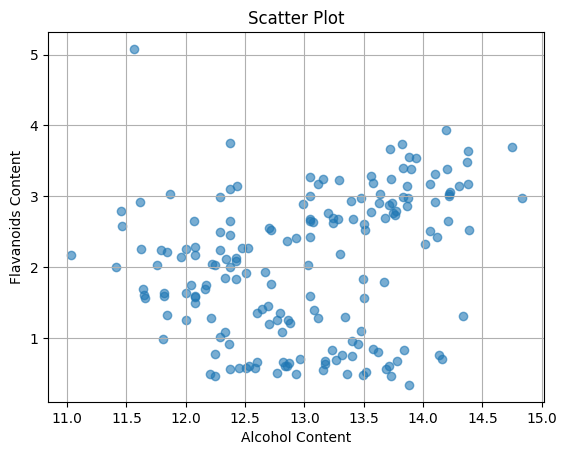

In [ ]:
## Scatter Plot of alcohol vs Flavanoids

plt.scatter(data.Alcohol, data.Flavanoids , alpha =0.6)
plt.xlabel("Alcohol Content")
plt.ylabel("Flavanoids")
plt.title("Scatter Plot")
plt.grid(True)
plt.show()

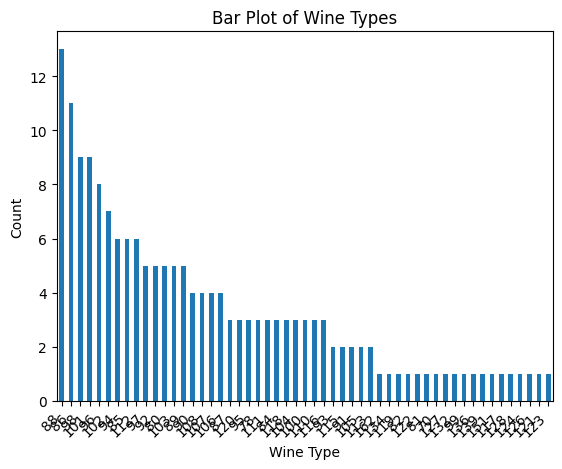

In [ ]:
## Bar plot
ax = data['Magnesium'].value_counts().plot(kind='bar')
plt.title('Bar Plot of Wine Types')
plt.xlabel('Wine Type')
plt.ylabel('Count')
plt.xticks(rotation=45, ha='right')  # Rotate labels and adjust alignment
plt.show()

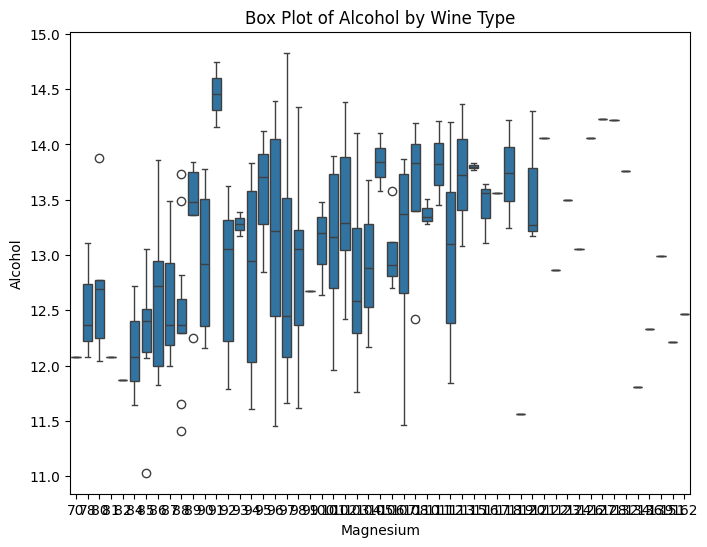

In [ ]:
## box plot using seaborn
plt.figure(figsize=(8, 6))
sns.boxplot(x='Magnesium', y='Alcohol', data=data)
plt.title('Box Plot of Alcohol by Wine Type')
plt.xlabel('Magnesium')
plt.ylabel('Alcohol')
plt.show()

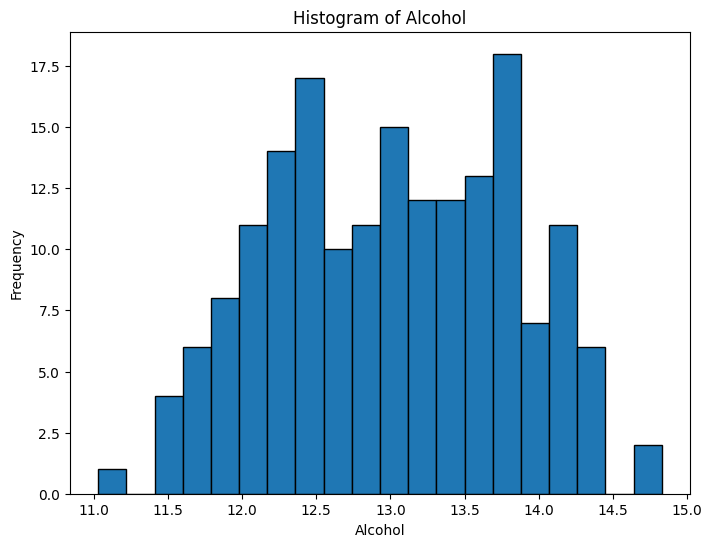

In [ ]:
## Histogram plot
plt.figure(figsize=(8, 6))
plt.hist(data['Alcohol'], bins=20, edgecolor='black')
plt.title('Histogram of Alcohol')
plt.xlabel('Alcohol')
plt.ylabel('Frequency')
plt.show()

Text(0.5, 1.02, 'Feature Distribution')

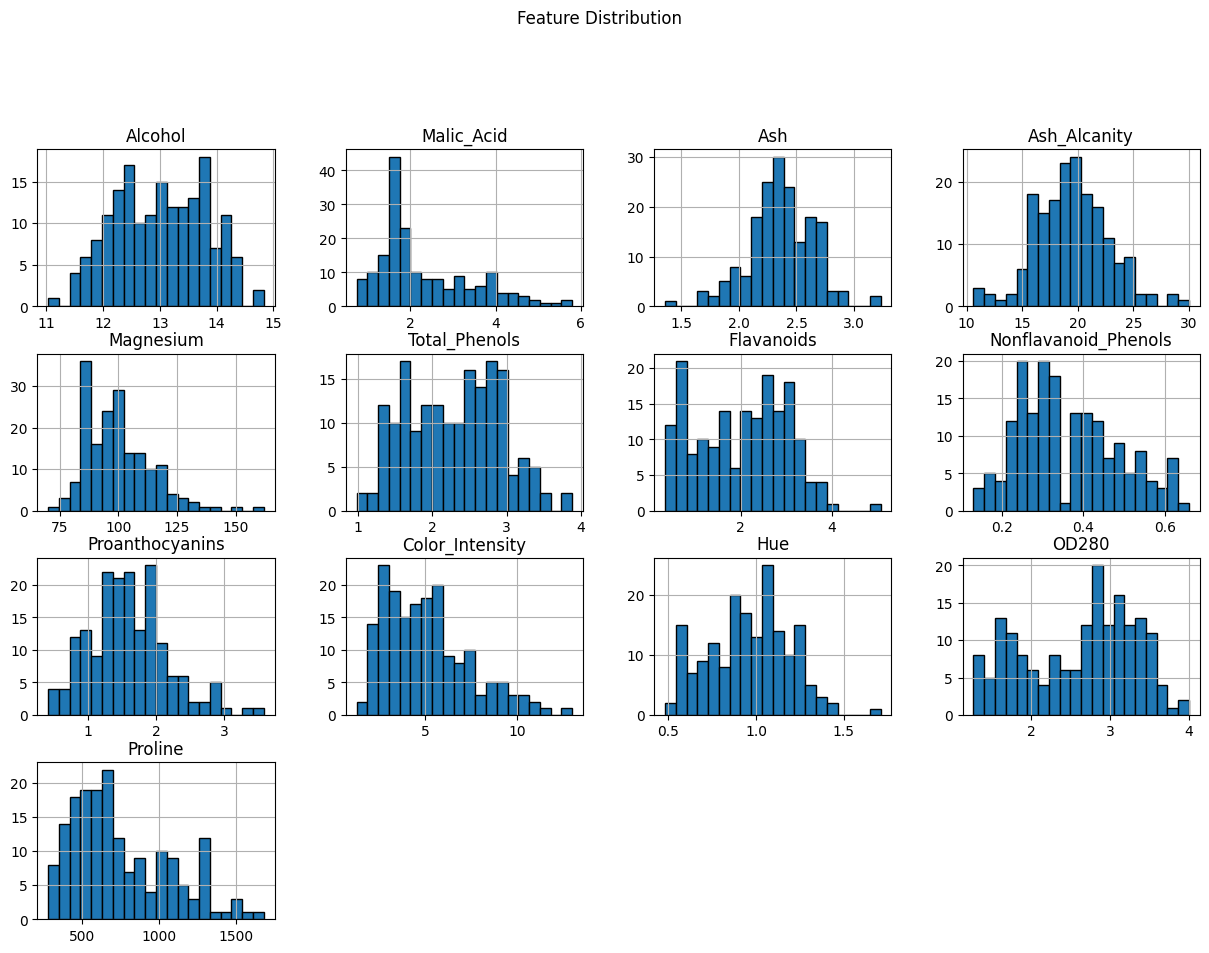

In [ ]:
data.hist(bins=20, figsize=(15, 10), edgecolor='black')
plt.suptitle('Feature Distribution',x=0.5,y=1.02,ha='center',fontsize='large')

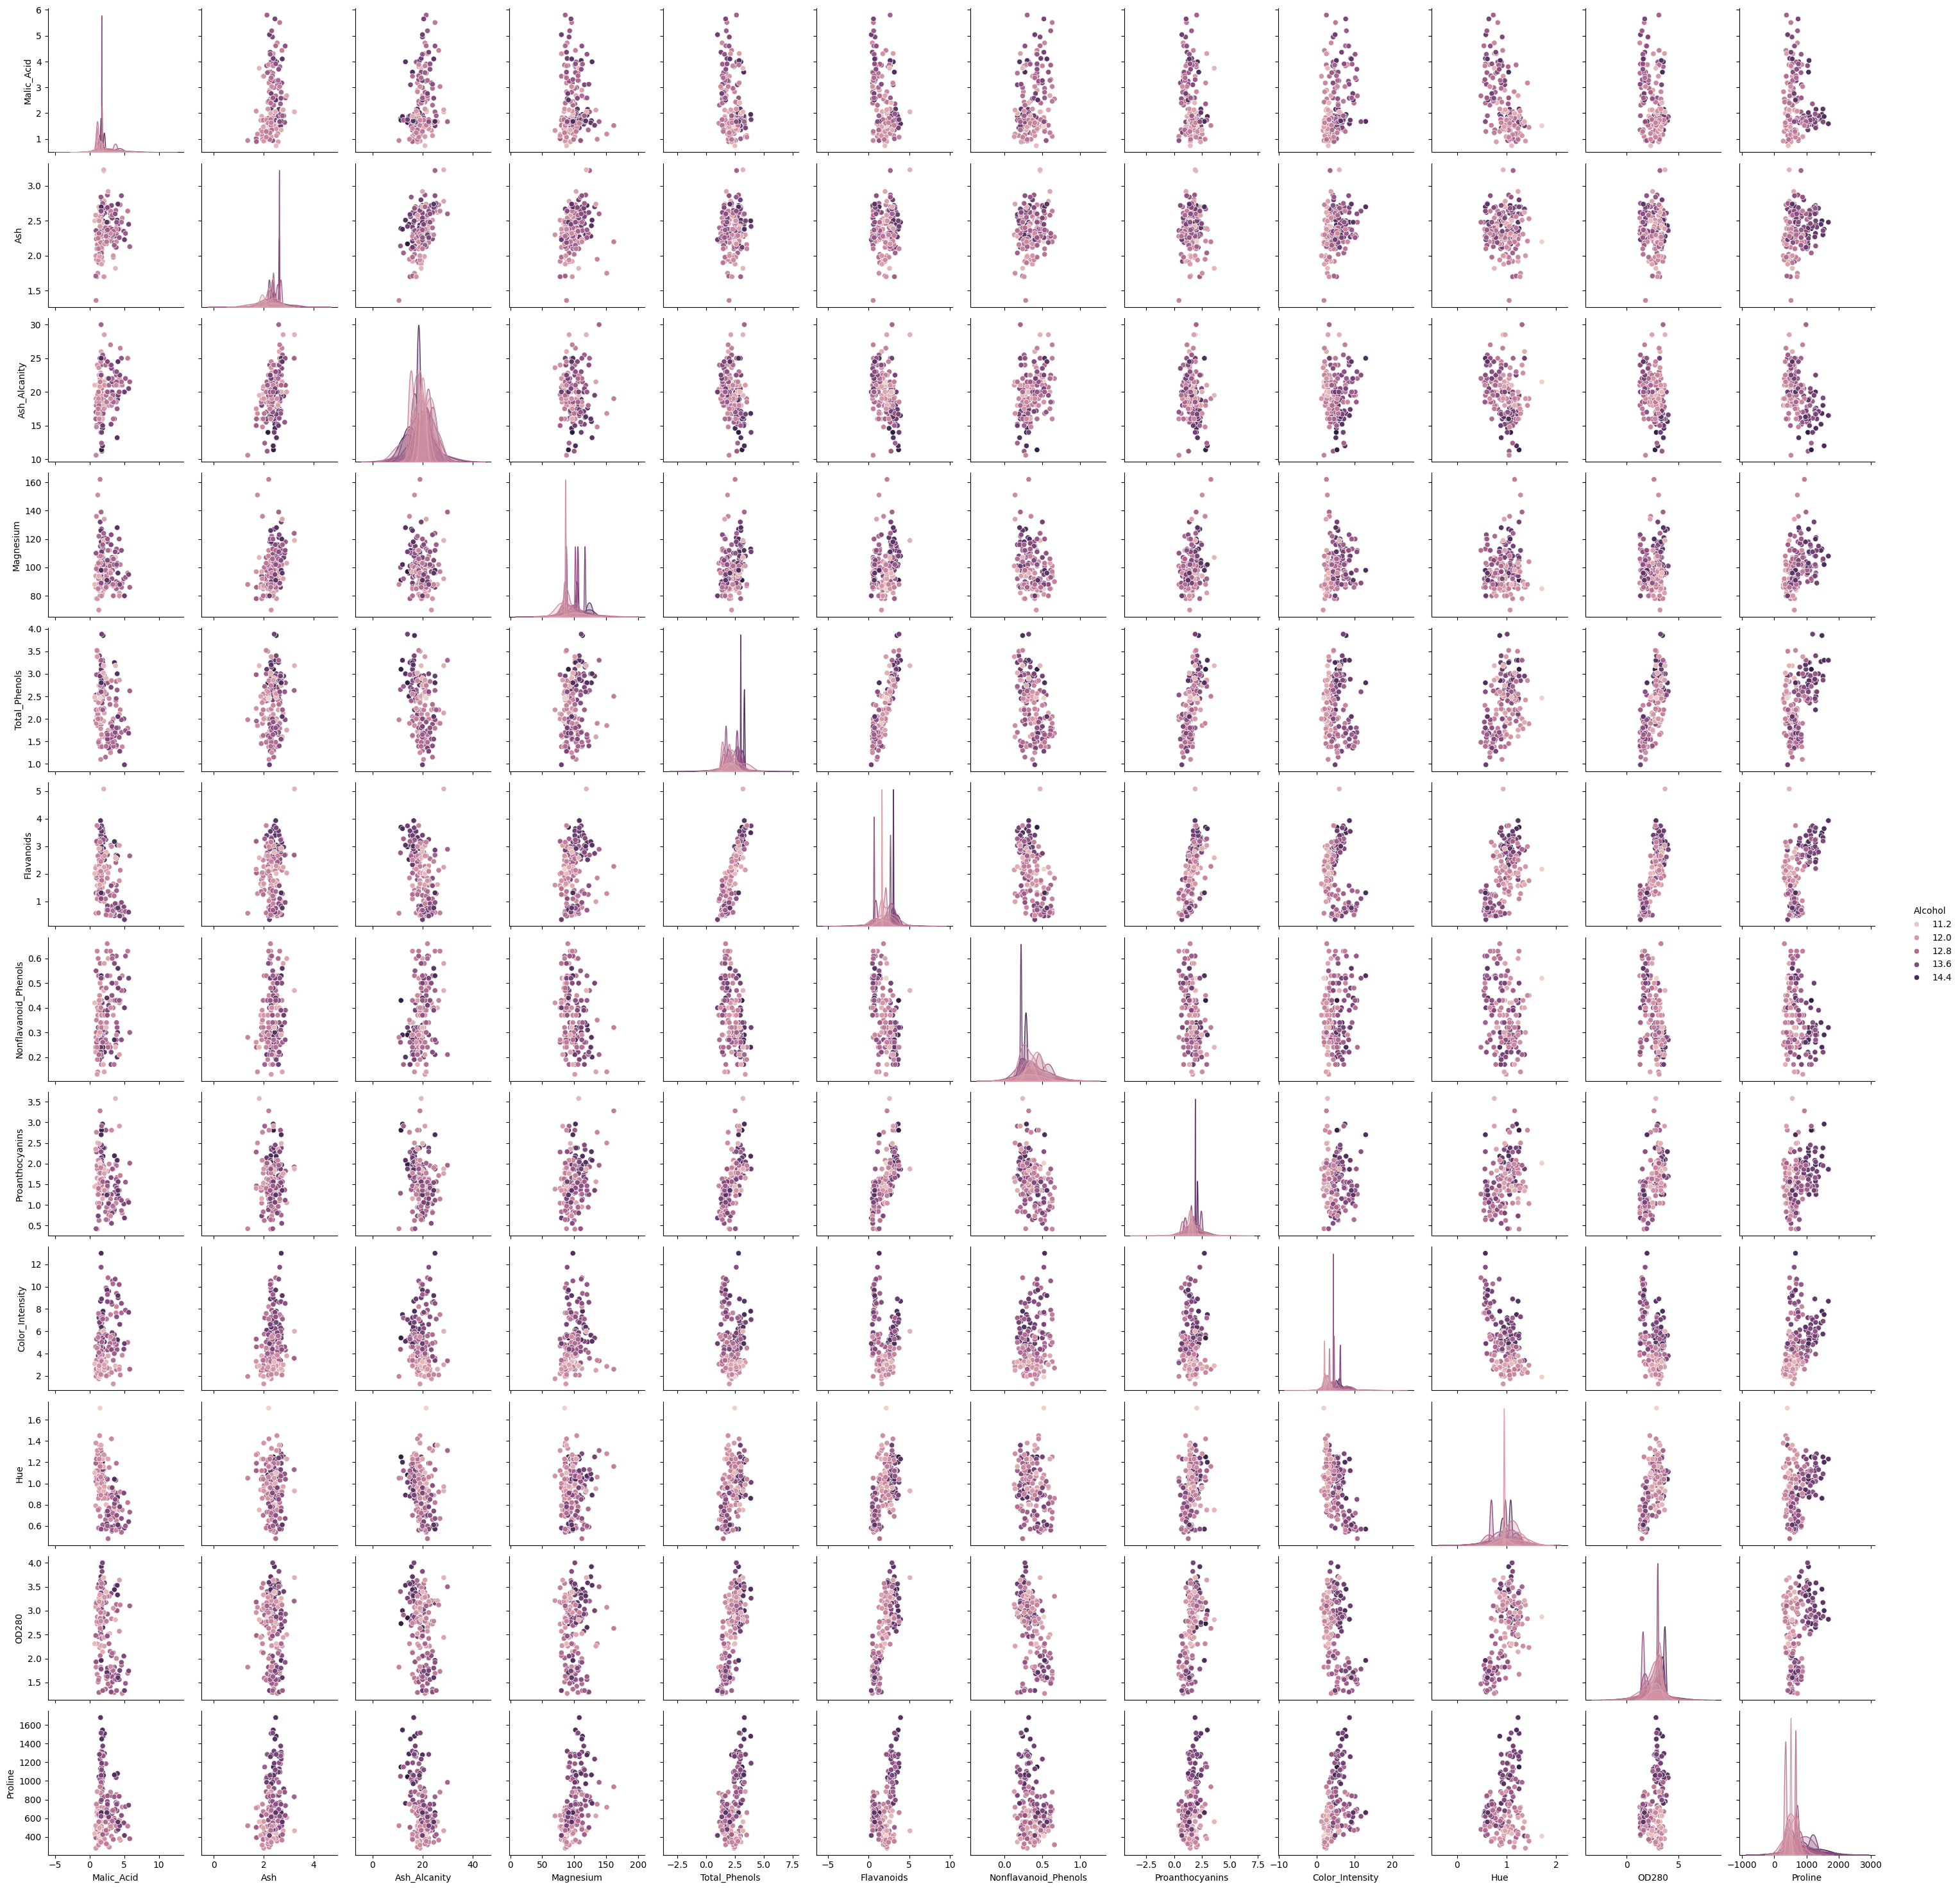

In [ ]:
## Pairplot for entire dataset study
sns.pairplot(data,hue='Alcohol')

Text(0.5, 1.02, 'Feature Distribution')

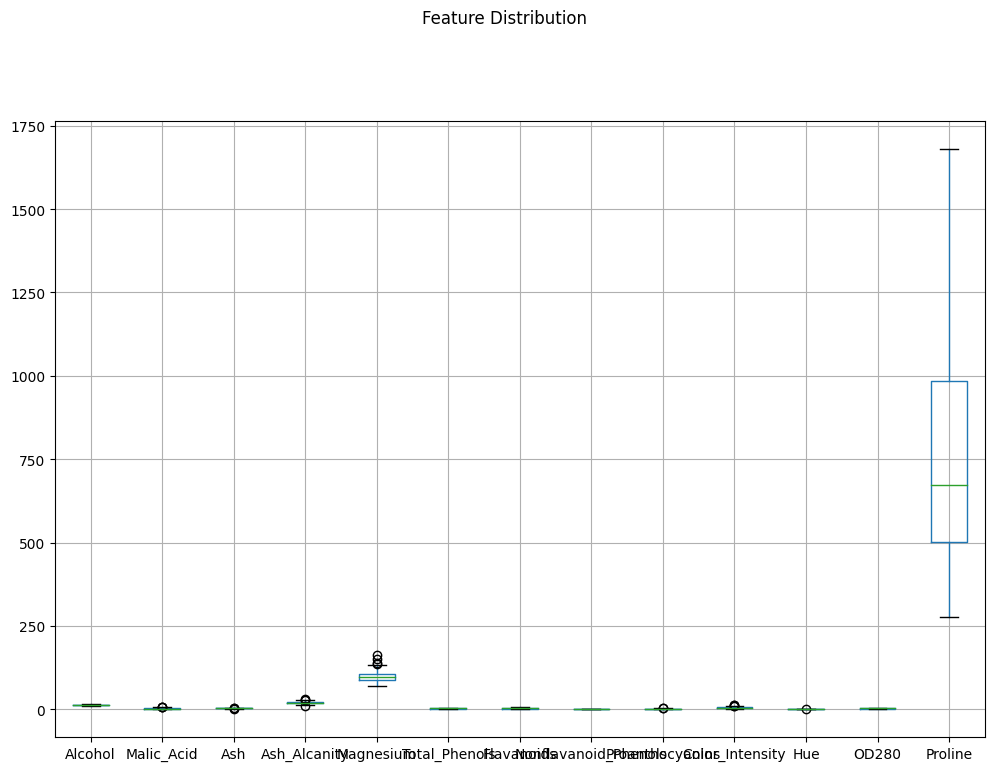

In [ ]:
data.boxplot(figsize=(12,8))
plt.suptitle('Feature Distribution',x=0.5,y=1.02,ha='center',fontsize='large')

Text(0.5, 1.0, 'Proline')

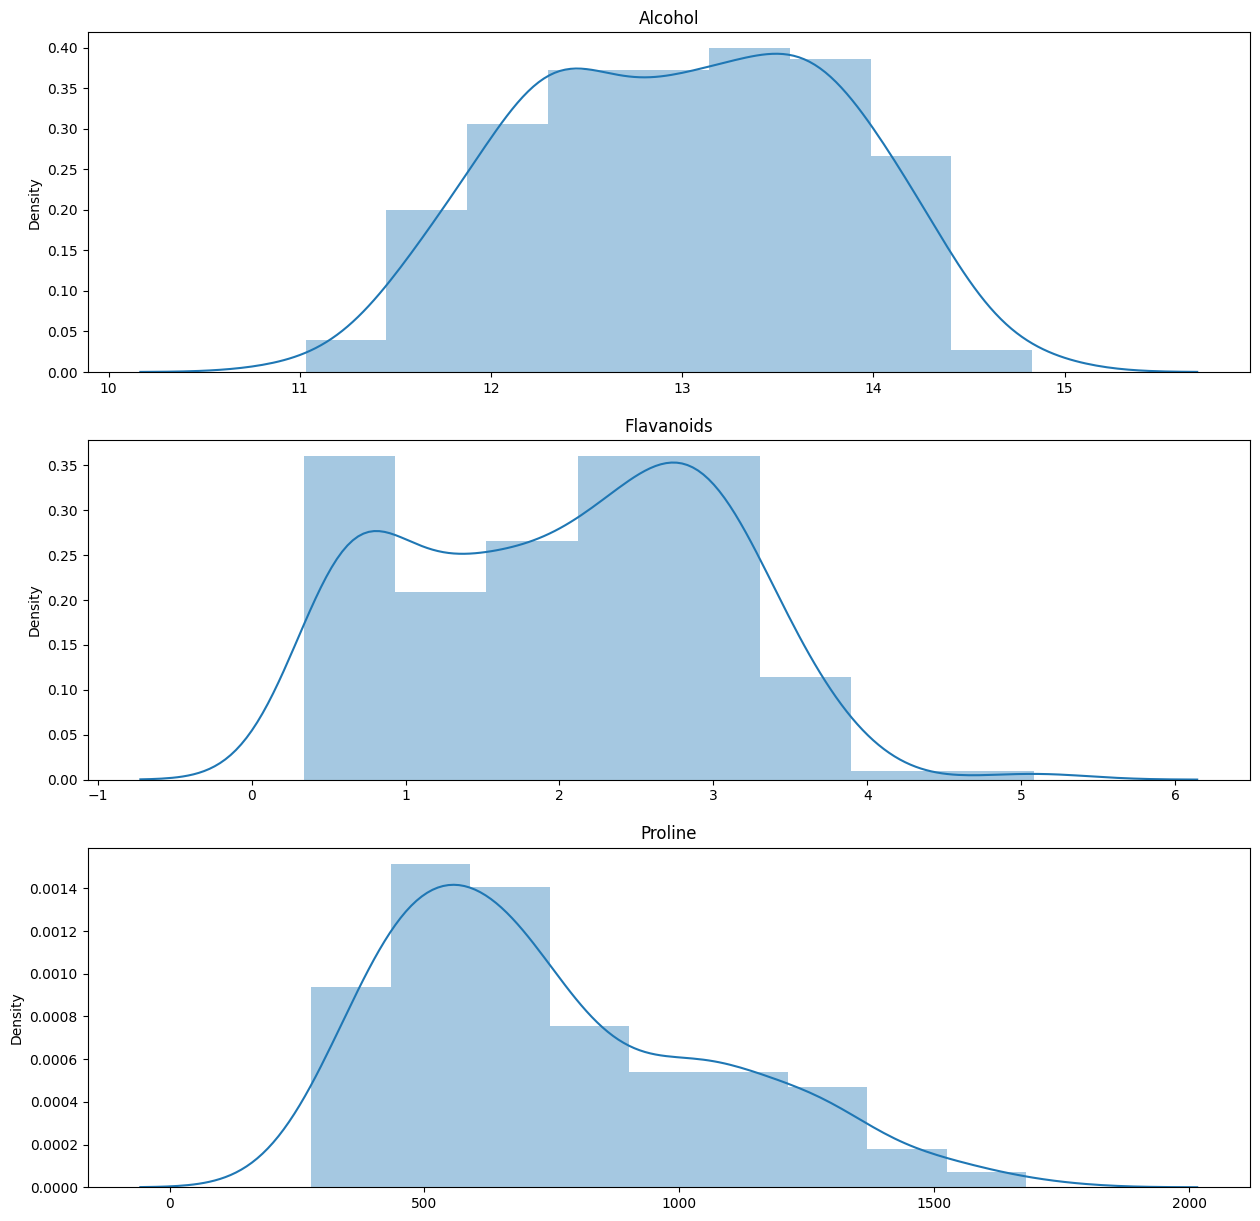

In [ ]:
## Kde plot
plt.figure(figsize=(15,15))
plt.subplot(3,1,1)
sns.distplot(x=data['Alcohol'],kde=True)
plt.title('Alcohol')

plt.subplot(3,1,2)
sns.distplot(x=data['Flavanoids'],kde=True)
plt.title('Flavanoids')

plt.subplot(3,1,3)
sns.distplot(x=data['Proline'],kde=True)
plt.title('Proline')

                       Alcohol  Malic_Acid       Ash  Ash_Alcanity  Magnesium  \
Alcohol               1.000000    0.094397  0.211545     -0.310235   0.270798   
Malic_Acid            0.094397    1.000000  0.164045      0.288500  -0.054575   
Ash                   0.211545    0.164045  1.000000      0.443367   0.286587   
Ash_Alcanity         -0.310235    0.288500  0.443367      1.000000  -0.083333   
Magnesium             0.270798   -0.054575  0.286587     -0.083333   1.000000   
Total_Phenols         0.289101   -0.335167  0.128980     -0.321113   0.214401   
Flavanoids            0.236815   -0.411007  0.115077     -0.351370   0.195784   
Nonflavanoid_Phenols -0.155929    0.292977  0.186230      0.361922  -0.256294   
Proanthocyanins       0.136698   -0.220746  0.009652     -0.197327   0.236441   
Color_Intensity       0.546364    0.248985  0.258887      0.018732   0.199950   
Hue                  -0.071747   -0.561296 -0.074667     -0.273955   0.055398   
OD280                 0.0723

<Axes: >

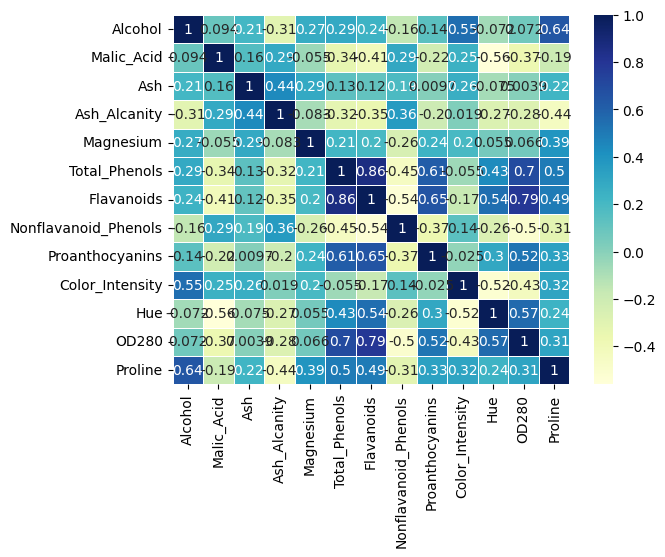

In [ ]:
#Heat map
corr=data.corr()
print(corr)
sns.heatmap(corr,annot=True,linewidths=.5,cmap="YlGnBu")


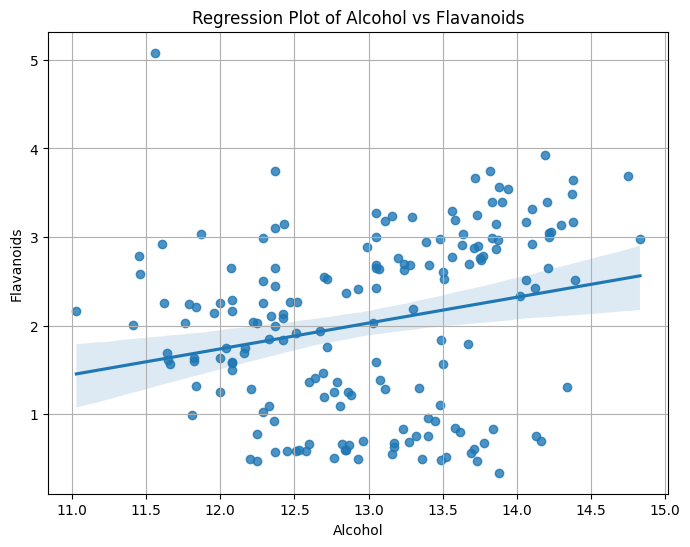

In [ ]:
#Regplot
plt.figure(figsize=(8, 6))
sns.regplot(x='Alcohol', y='Flavanoids', data=data)
plt.title('Regression Plot of Alcohol vs Flavanoids')
plt.xlabel('Alcohol')
plt.ylabel('Flavanoids')
plt.grid(True)
plt.show()

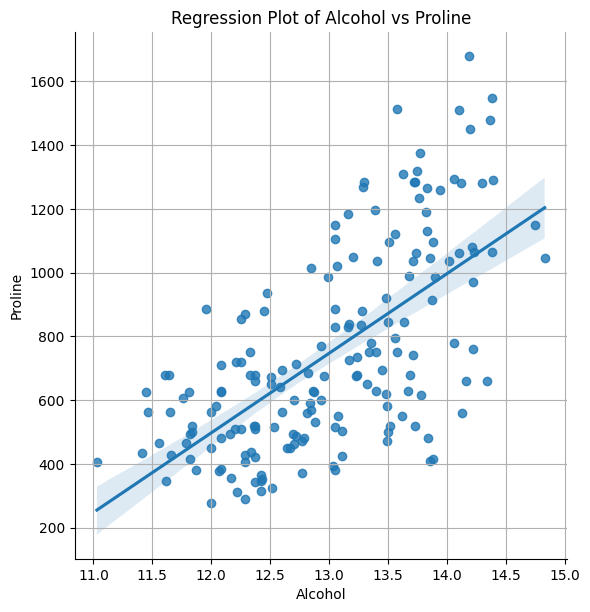

In [ ]:
# Implot for Alcohol and Proline
sns.lmplot(x='Alcohol', y='Proline', data=data, height=6)
plt.title('Regression Plot of Alcohol vs Proline')
plt.xlabel('Alcohol')
plt.ylabel('Proline')
plt.grid(True)
plt.show()

<Figure size 800x600 with 0 Axes>

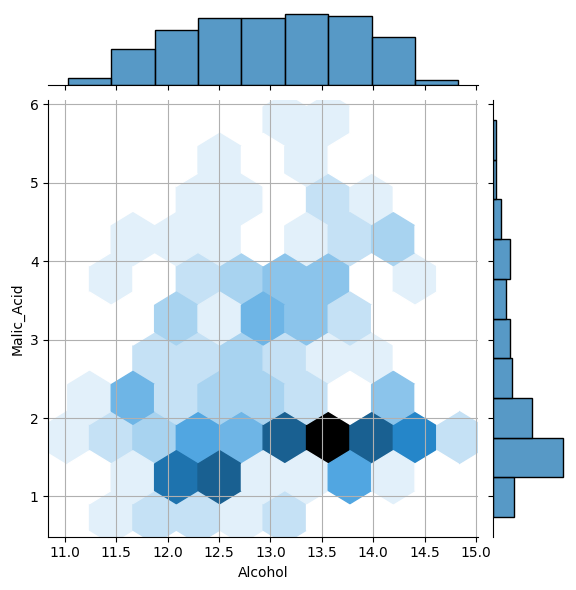

In [ ]:
# Jointplot
plt.figure(figsize=(8, 6))
sns.jointplot(x='Alcohol', y='Malic_Acid', data=data, kind='hex')
plt.xlabel('Alcohol')
plt.ylabel('Malic_Acid')
plt.grid(True)
plt.show()

<Figure size 800x600 with 0 Axes>

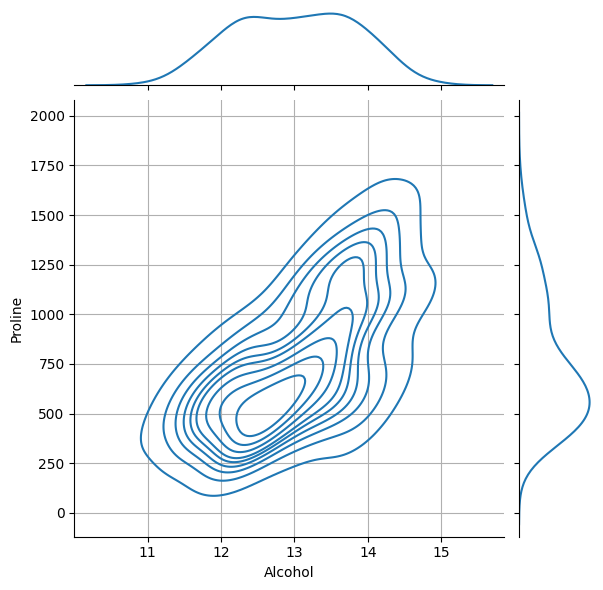

In [ ]:
# Jointplot
plt.figure(figsize=(8, 6))
sns.jointplot(x='Alcohol', y='Proline', data=data, kind='kde')
plt.xlabel('Alcohol')
plt.ylabel('Proline')
plt.grid(True)
plt.show()

<Figure size 800x600 with 0 Axes>

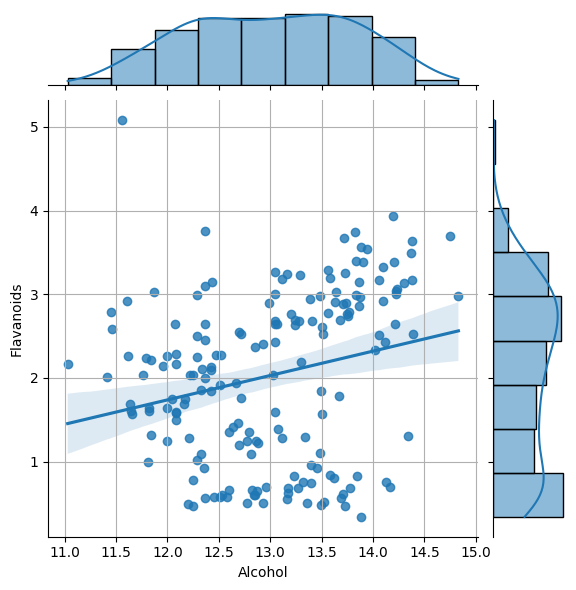

In [ ]:
# Jointplot
plt.figure(figsize=(8, 6))
sns.jointplot(x='Alcohol', y='Flavanoids', data=data, kind='reg')
plt.xlabel('Alcohol')
plt.ylabel('Flavanoids')
plt.grid(True)
plt.show()

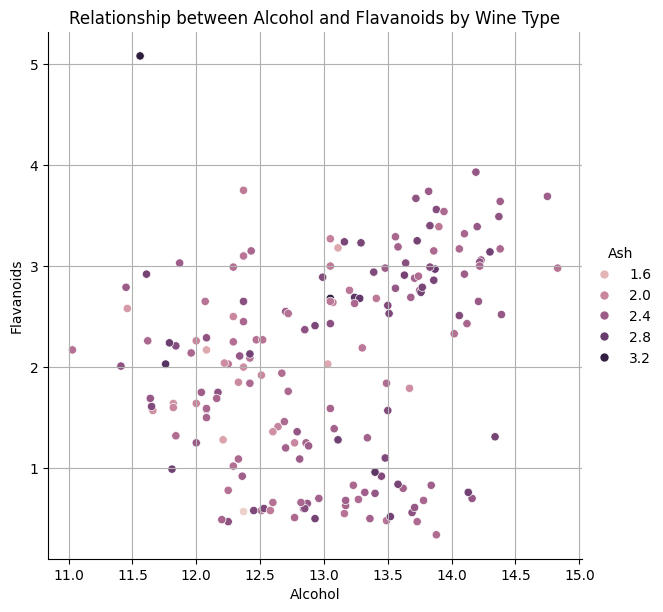

In [ ]:
sns.relplot(x='Alcohol', y='Flavanoids', hue='Ash', data=data, kind='scatter', height=6)
plt.title('Relationship between Alcohol and Flavanoids by Wine Type')
plt.xlabel('Alcohol')
plt.ylabel('Flavanoids')
plt.grid(True)
plt.show()

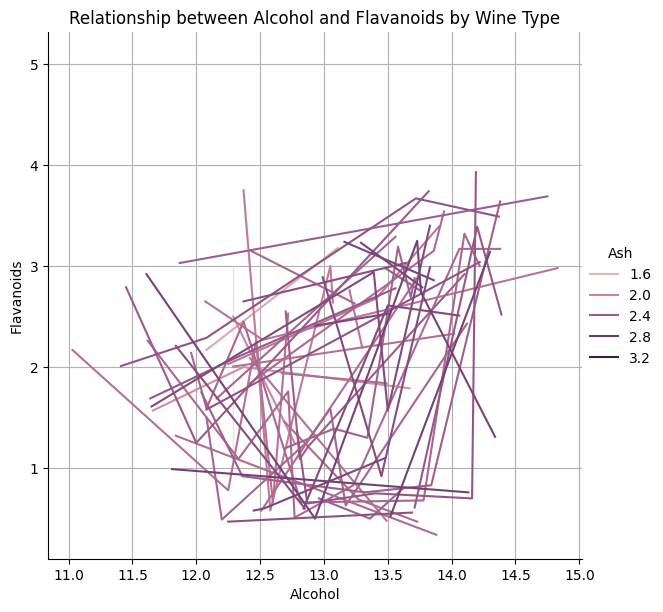

In [ ]:
sns.relplot(x='Alcohol', y='Flavanoids', hue='Ash', data=data, kind='line', height=6)
plt.title('Relationship between Alcohol and Flavanoids by Wine Type')
plt.xlabel('Alcohol')
plt.ylabel('Flavanoids')
plt.grid(True)
plt.show()